In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('water_potability.csv')

In [3]:
data.sample(5) 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2226,7.885679,207.821304,12359.631194,7.377663,340.978985,499.361690,14.045191,97.627160,5.430350,0
925,7.602121,199.353166,11346.143453,6.900380,304.966488,210.319182,17.925782,62.846673,3.698875,0
2590,NaN,183.219904,20311.402466,6.790897,381.459023,344.967064,11.138459,71.704595,3.887362,0
2429,6.438422,202.537835,26448.245087,5.775933,322.451774,567.201675,12.641968,55.701067,3.380360,1
1171,6.043360,188.662329,24856.607107,4.371025,295.895207,355.007461,7.619812,79.944916,4.745248,1


In [4]:
data.shape

(3276, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### checking null values or missing values 

In [7]:
data.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
# Get rows with any NaNs
data[data.isna().any(axis=1)].shape

(1265, 10)

In [9]:
df = data

In [10]:
rows_with_nans = df[df.isna().any(axis=1)]
rows_with_nans.columns[rows_with_nans.isna().any()].tolist()

['ph', 'Sulfate', 'Trihalomethanes']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Handling PH 

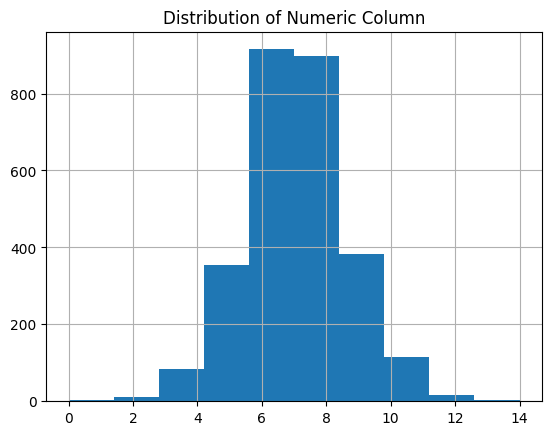

In [12]:


# Histogram for numerical dadf['ph'].hist()
df['ph'].hist()
plt.title('Distribution of Numeric Column')
plt.show()



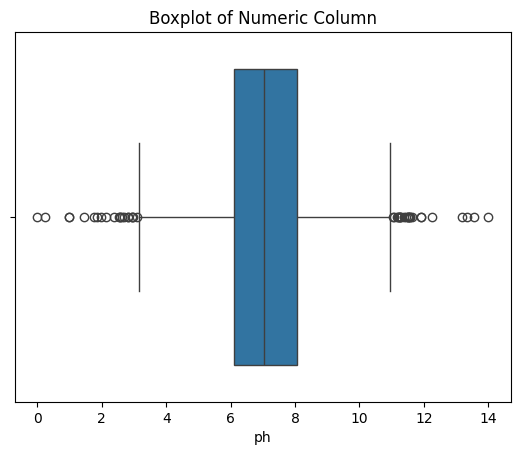

In [13]:
sns.boxplot(x=df['ph'])
plt.title('Boxplot of Numeric Column')
plt.show()

In [14]:
from scipy.stats import skew

# Compute skewness
skewness = skew(df['ph'].dropna())
print(f'Skewness of ph: {skewness}')

Skewness of ph: 0.025616641016486575


In [15]:
# Identify outliers using IQR
Q1 = df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['ph'] < (Q1 - 1.5 * IQR)) | (df['ph'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 46


In [16]:
df=df[~((df['ph'] < (Q1 - 1.5 * IQR)) | (df['ph'] > (Q3 + 1.5 * IQR)))]

In [17]:
# For numerical columns
mean_value = df['ph'].mean()
median_value = df['ph'].median()
print(f'Mean: {mean_value}, Median: {median_value}')

# For categorical columns
mode_value = df['ph'].mode()[0]
print(f'Mode: {mode_value}')


Mean: 7.076056583125148, Median: 7.033945358536714
Mode: 3.14871228517616


In [18]:
# Impute with median for the 'ph' column
median_value = df['ph'].mean()
df['ph'].fillna(median_value, inplace=True)


/tmp/ipykernel_5822/134992766.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(median_value, inplace=True)
/tmp/ipykernel_5822/134992766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'].fillna(median_value, inplace=True)


#### Handling Sulfate 

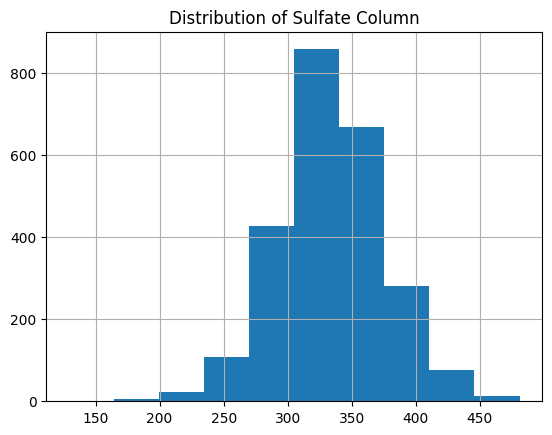

In [19]:
df['Sulfate'].hist()
plt.title('Distribution of Sulfate Column')
plt.show()

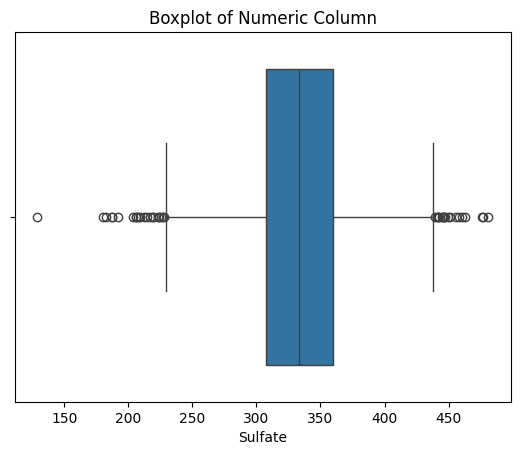

In [20]:
sns.boxplot(x=df['Sulfate'])
plt.title('Boxplot of Numeric Column')
plt.show()

In [21]:
from scipy.stats import skew

# Compute skewness
skewness = skew(df['Sulfate'].dropna())
print(f'Skewness of ph: {skewness}')

Skewness of ph: -0.0394242052861161


In [22]:
Q1 = df['Sulfate'].quantile(0.25)
Q3 = df['Sulfate'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sulfate'] < (Q1 - 1.5 * IQR)) | (df['Sulfate'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 40


In [23]:
df=df[~((df['Sulfate'] < (Q1 - 1.5 * IQR)) | (df['Sulfate'] > (Q3 + 1.5 * IQR)))]

In [24]:
# Calculate mean value for the 'Sulfate' column
mean_value = df['Sulfate'].mean()
# Impute missing values with mean
df['Sulfate'].fillna(mean_value, inplace=True)


/tmp/ipykernel_5822/508085122.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulfate'].fillna(mean_value, inplace=True)


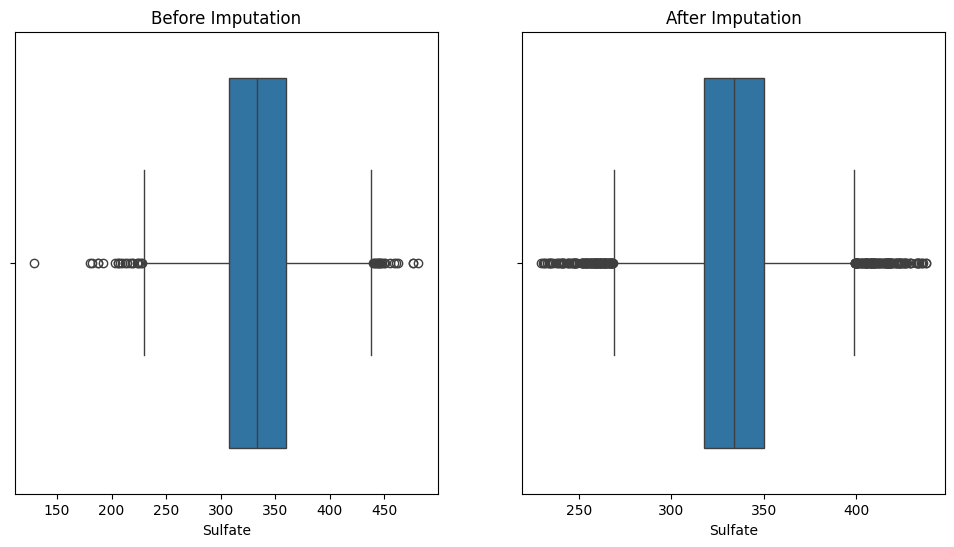

In [25]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Before Imputation
df_before_imputation = pd.read_csv('water_potability.csv')  # Load original data
sns.boxplot(x=df_before_imputation['Sulfate'], ax=axs[0])
axs[0].set_title('Before Imputation')

# After Imputation
sns.boxplot(x=df['Sulfate'], ax=axs[1])
axs[1].set_title('After Imputation')

plt.show()


#### Handling Trihalomethanes

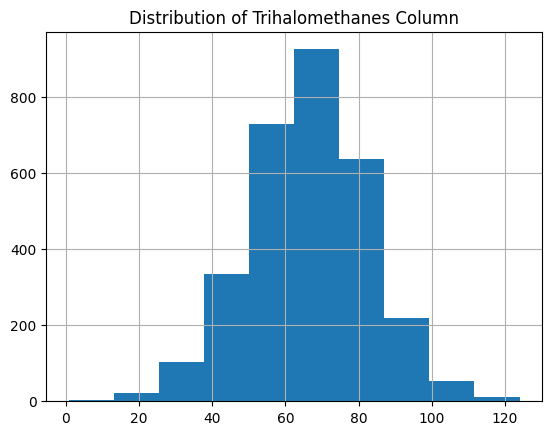

In [26]:

df['Trihalomethanes'].hist()
plt.title('Distribution of Trihalomethanes Column')
plt.show()



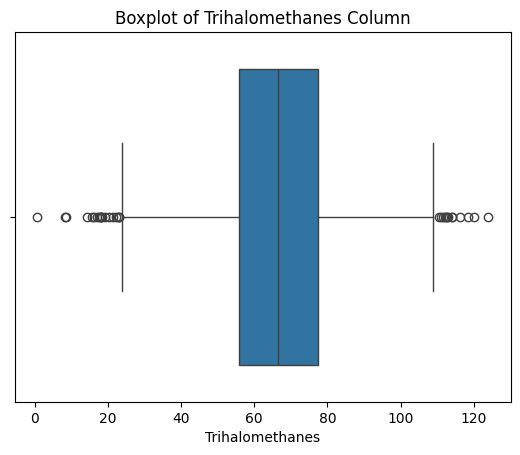

In [27]:
sns.boxplot(x=df['Trihalomethanes'])
plt.title('Boxplot of Trihalomethanes Column')
plt.show()

In [28]:
Q1 = df['Trihalomethanes'].quantile(0.25)
Q3 = df['Trihalomethanes'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Trihalomethanes'] < (Q1 - 1.5 * IQR)) | (df['Trihalomethanes'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 32


In [29]:
df=df[~((df['Trihalomethanes'] < (Q1 - 1.5 * IQR)) | (df['Trihalomethanes'] > (Q3 + 1.5 * IQR)))]

In [30]:
# Calculate mean value for the 'Sulfate' column
mean_value = df['Trihalomethanes'].mean()

# Impute missing values with mean
df['Trihalomethanes'].fillna(mean_value, inplace=True)

/tmp/ipykernel_5822/4245971872.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trihalomethanes'].fillna(mean_value, inplace=True)


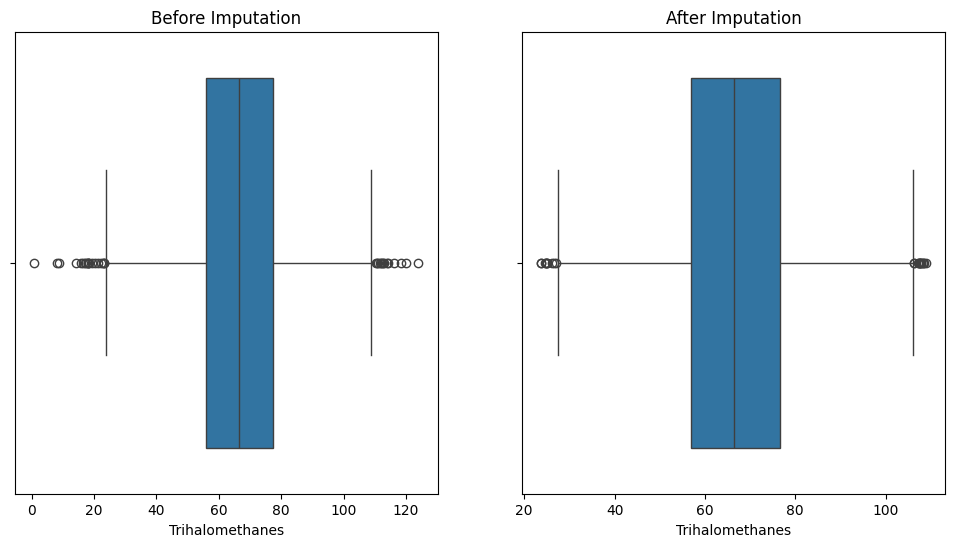

In [31]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Before Imputation
df_before_imputation = pd.read_csv('water_potability.csv')  # Load original data
sns.boxplot(x=df_before_imputation['Trihalomethanes'], ax=axs[0])
axs[0].set_title('Before Imputation')

# After Imputation
sns.boxplot(x=df['Trihalomethanes'], ax=axs[1])
axs[1].set_title('After Imputation')

plt.show()

In [32]:
# Get rows with any NaNs
df[df.isna().any(axis=1)].shape

(0, 10)

In [33]:
pip install lightgbm xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(2526, 9)

In [36]:
y_train.shape

(2526,)

In [37]:
X_test.shape

(632, 9)

In [38]:
y_test.shape

(632,)

### Applying LIGHT BGM 

In [39]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [40]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

print("LightGBM Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgb_predictions)}")
print(classification_report(y_test, lgb_predictions))

[LightGBM] [Info] Number of positive: 1000, number of negative: 1526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2526, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395883 -> initscore=-0.422650
[LightGBM] [Info] Start training from score -0.422650
LightGBM Performance:
Accuracy: 0.6787974683544303
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       407
           1       0.58      0.37      0.45       225

    accuracy                           0.68       632
   macro avg       0.64      0.61      0.61       632
weighted avg       0.66      0.68      0.66       632



### Applying XG Boost

In [41]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(classification_report(y_test, xgb_predictions))


/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.6487341772151899
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       407
           1       0.51      0.40      0.45       225

    accuracy                           0.65       632
   macro avg       0.61      0.59      0.60       632
weighted avg       0.63      0.65      0.64       632



## Fine Tunning Hyper Parameters 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:


param_grid_lgb = {
    'num_leaves': [31, 50],
    'max_depth': [10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [40, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid_lgb, cv=3)
grid_search_lgb.fit(X_train, y_train)
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)



[LightGBM] [Info] Number of positive: 666, number of negative: 1018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395487 -> initscore=-0.424306
[LightGBM] [Info] Start training from score -0.424306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 667, number of negative: 1017
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Numb

In [44]:

param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)


/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:23:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:23:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:23:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ankitmishralive/.local/lib/python3.10/site-packages/xgboost/core.py:158: U

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}


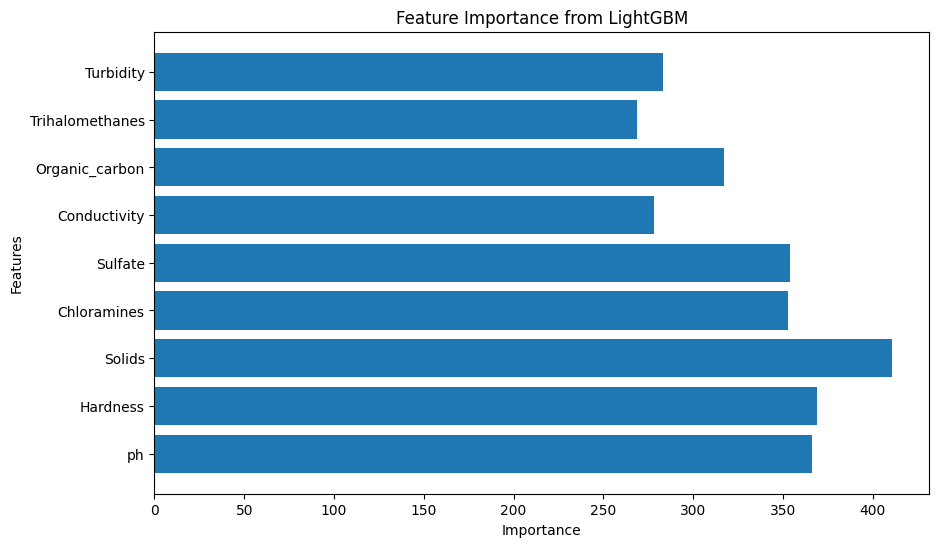

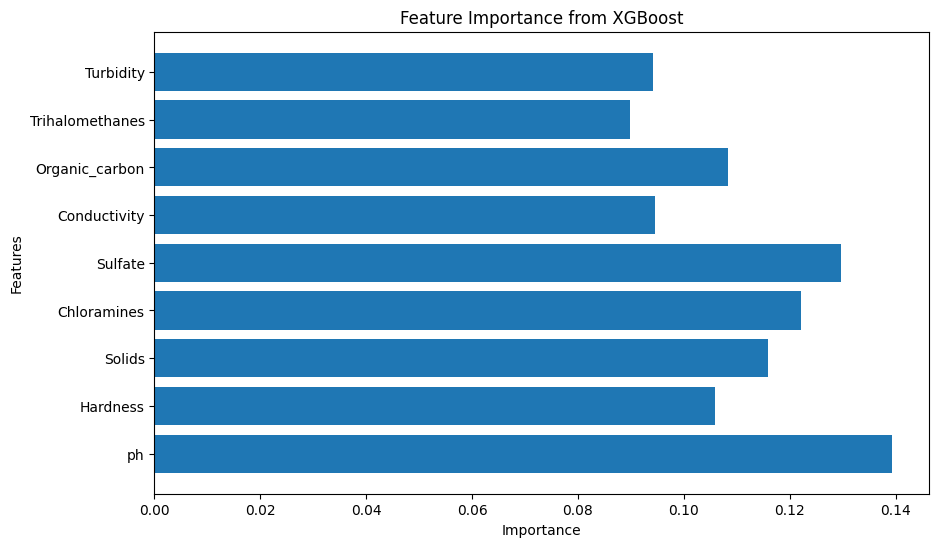

In [45]:
import matplotlib.pyplot as plt

# Feature importance for LightGBM
lgb_importances = lgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, lgb_importances)
plt.title('Feature Importance from LightGBM')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_importances)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


### Evaluating with Best Parameters 

In [46]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

lgbm_model_best = lgb.LGBMClassifier(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=20,
    n_estimators=100,
    num_leaves=31,
    subsample=0.8
)

# : {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 50, 'subsample': 0.8}
# Training 
lgbm_model_best.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
 
)

lgb_best_predictions = lgbm_model_best.predict(X_test)


print("LightGBM Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, lgb_best_predictions)}")
print(classification_report(y_test, lgb_best_predictions))
print(f"ROC-AUC Score: {roc_auc_score(y_test, lgbm_model_best.predict_proba(X_test)[:,1])}")


[LightGBM] [Info] Number of positive: 1000, number of negative: 1526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2526, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395883 -> initscore=-0.422650
[LightGBM] [Info] Start training from score -0.422650
LightGBM Performance with Best Parameters:
Accuracy: 0.6867088607594937
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       407
           1       0.60      0.35      0.44       225

    accuracy                           0.69       632
   macro avg       0.66      0.61      0.61       632
weighted avg       0.67      0.69      0.66       632

ROC-AUC Score: 0.6753917553917553


In [47]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

xgb_model_best = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=10,
    n_estimators=200,
    objective='binary:logistic',
    eval_metric='logloss'
)

# Fit the model
xgb_model_best.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],

    # verbose=True
)



xgb_best_predictions = xgb_model_best.predict(X_test)


print("XGBoost Performance with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, xgb_best_predictions)}")
print(classification_report(y_test, xgb_best_predictions))
print(f"ROC-AUC Score: {roc_auc_score(y_test,xgb_model_best.predict_proba(X_test)[:,1])}")


[0]	validation_0-logloss:0.65399
[1]	validation_0-logloss:0.65335
[2]	validation_0-logloss:0.65241
[3]	validation_0-logloss:0.65175
[4]	validation_0-logloss:0.65086
[5]	validation_0-logloss:0.65021
[6]	validation_0-logloss:0.64933
[7]	validation_0-logloss:0.64863
[8]	validation_0-logloss:0.64783
[9]	validation_0-logloss:0.64695
[10]	validation_0-logloss:0.64640
[11]	validation_0-logloss:0.64556
[12]	validation_0-logloss:0.64501
[13]	validation_0-logloss:0.64433
[14]	validation_0-logloss:0.64381
[15]	validation_0-logloss:0.64304
[16]	validation_0-logloss:0.64268
[17]	validation_0-logloss:0.64203
[18]	validation_0-logloss:0.64125
[19]	validation_0-logloss:0.64051
[20]	validation_0-logloss:0.64016
[21]	validation_0-logloss:0.63960
[22]	validation_0-logloss:0.63918
[23]	validation_0-logloss:0.63868
[24]	validation_0-logloss:0.63829
[25]	validation_0-logloss:0.63761
[26]	validation_0-logloss:0.63697
[27]	validation_0-logloss:0.63644
[28]	validation_0-logloss:0.63599
[29]	validation_0-loglos

## Experiment Tracking via MLFlow

In [48]:
import mlflow

In [70]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import mlflow
import mlflow.lightgbm
import pandas as pd

# Define your smaller parameter grid
param_grid_lgb = {
    'num_leaves': [20, 31, 50],
    'max_depth': [10, 15, 20, 30],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Load your data
# Example: X_train, X_test, y_train, y_test = train_test_split(...)

# Initialize MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("lightgbm_hyperparameter_tuning")

# Start outer MLflow run for Randomized Search
with mlflow.start_run(run_name="Randomized Search") as outer_run:
    # Initialize the model
    lgbm_model = lgb.LGBMClassifier()

    # Randomized Search for faster hyperparameter tuning
    random_search_lgb = RandomizedSearchCV(
        estimator=lgbm_model,
        param_distributions=param_grid_lgb,
        n_iter=5,  # Reduced number of iterations
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )

    # Fit the model
    random_search_lgb.fit(X_train, y_train)

    # Log the best parameters
    best_params = random_search_lgb.best_params_
    mlflow.log_params(best_params)
    
    # Save best parameters to use in the next run

# Start MLflow run for the Best Model
with mlflow.start_run(run_name="Best Model") as inner_run:
    # Load the best parameters from the artifact

    # Initialize the model with best parameters
    lgbm_model = lgb.LGBMClassifier(**best_params)

    # Fit the model with the entire training data
    lgbm_model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = lgbm_model.predict(X_test)
    
    # Log model metrics
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)
    
    # Print and log classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    mlflow.log_metrics({
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    })

    # Log the model itself
    mlflow.lightgbm.log_model(lgbm_model, "model")

    print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 666, number of negative: 1018
[LightGBM] [Info] Number of positive: 667, number of negative: 1017
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395487 -> initscore=-0.424306
[LightGBM] [Info] Number of positive: 667, number of negative: 1017
[LightGBM] [Info] Start training from score -0.424306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 9
[LightGBM] [Info] [binary:Bo

2024/08/23 01:46:07 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/08/23 01:46:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Randomized Search at: http://127.0.0.1:5000/#/experiments/951416012910848395/runs/0e5dfa45b23641e28d82a6f6d4a5582b.
2024/08/23 01:46:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/951416012910848395.


[LightGBM] [Info] Number of positive: 1000, number of negative: 1526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2526, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395883 -> initscore=-0.422650
[LightGBM] [Info] Start training from score -0.422650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

2024/08/23 01:46:08 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/23 01:46:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best Model at: http://127.0.0.1:5000/#/experiments/951416012910848395/runs/f1178b2166014fbe88a7b636c45cf737.
2024/08/23 01:46:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/951416012910848395.


Test Accuracy: 0.6566455696202531
